In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

In [2]:
variables = pd.read_excel("../data/PAKDD2010_VariablesList.xls")
variables

,Var_Id,Var_Title,Var_Description,Field_Content
0,1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
1,2,CLERK_TYPE,Not informed,C
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
5,6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
6,7,SEX,NaN,"M=Male, F=Female"
7,8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
8,9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."
9,10,EDUCATION_LEVEL,Edducational level in gradual order not informed,"1,2,3,4,5"


In [3]:
list_columns = variables.Var_Title.tolist()

In [4]:
len(set(list_columns))

53

In [5]:
#change name to duplicate column name
list_columns[43] = "MATE_EDUCATION_LEVEL"

In [6]:
#dat we will not use - incomplete
#pd.read_csv('../data/PAKDD2010_Leaderboard_Submission_Example.txt', encoding = 'ISO-8859-1', delimiter='\t')

MODELING DATASET

In [7]:
data = pd.read_csv('../data/PAKDD2010_Modeling_Data.txt', encoding = 'ISO-8859-1', delimiter='\t', low_memory=False, names = list_columns)
data

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,...,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320,320,1


In [8]:
#dat we will not use - incomplete
#pd.read_csv("data/PAKDD2010_Prediction_Data.txt", encoding = 'ISO-8859-1', delimiter="\t", names = list_columns_reduced)

MODELING DF

In [9]:
df_data = pd.DataFrame(data)
df_data

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591,591,1
49996,49997,C,25,0,0,1,F,1,0,0,...,0,0,0,0,2,N,21,186,186,0
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715,715,0
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320,320,1


TARGET DF

In [19]:
df_data_target = df_data[["TARGET_LABEL_BAD=1"]]

In [20]:
df_data_target.to_pickle("df_data_target")

In [10]:
print(df_data["TARGET_LABEL_BAD=1"].value_counts())

0    36959
1    13041
Name: TARGET_LABEL_BAD=1, dtype: int64


In [11]:
print(df_data["TARGET_LABEL_BAD=1"].value_counts()/df_data["TARGET_LABEL_BAD=1"].value_counts().sum())

0    0.73918
1    0.26082
Name: TARGET_LABEL_BAD=1, dtype: float64


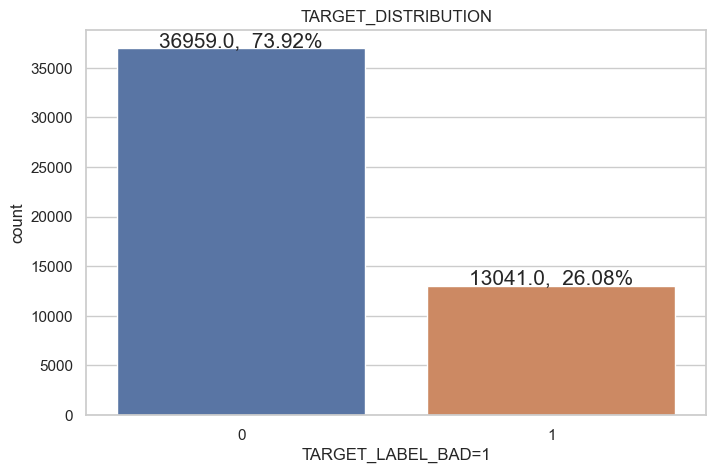

In [12]:
sns.set(style="whitegrid")

# Defining the plot size
plt.figure(figsize=(8, 5))
total = float(len(df_data["TARGET_LABEL_BAD=1"]))

# Defining the values for x-axis
# and from which dataframe the values are to be picked
plots = sns.countplot(x="TARGET_LABEL_BAD=1" , data=df_data)
# Iterate over the bars one-by-one
for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
    plots.annotate(f"{bar.get_height()},  {round((100 * bar.get_height()/total),2)}%",(bar.get_x() + bar.get_width() / 2,bar.get_height()),
                   ha='center', va='center',
                   size=15, xytext=(0, 5),textcoords='offset points')
# Setting the title for the graph
plt.title("TARGET_DISTRIBUTION")
# showing the plot
plt.show()

FEATURES DF

In [13]:
df_data_features = df_data.drop("TARGET_LABEL_BAD=1", axis = 1)
df_data_features["ALL_INCOMES"] = df_data_features["PERSONAL_MONTHLY_INCOME"]+df_data_features["OTHER_INCOMES"]
df_data_features

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,ALL_INCOMES
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,900.00
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,750.00
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,500.00
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,500.00
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591,591,1451.00
49996,49997,C,25,0,0,1,F,1,0,0,...,0,0,0,0,2,N,21,186,186,450.00
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715,715,1555.00
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320,320,1443.27


In [14]:
df_data_features.to_pickle("df_data_features")

In [15]:
df_data_features.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,...,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,ALL_INCOMES
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,...,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,...,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,922.113196
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,...,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,7897.469079
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,60.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,372.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,...,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,515.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,...,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,840.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,...,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,959000.000000


In [16]:
#number of columns of each data type
df_data_features.dtypes.value_counts()

int64      24
object     20
float64    10
dtype: int64

#### ANALYZING FEATURES WITH NULL VALUES

In [17]:
#Percentages of nan values
null_vars_porc = round(df_data_features.isnull().sum().sort_values(ascending = False)/len(df_data_features)*100,2)
null_vars_porc[:10]

PROFESSIONAL_CITY                 67.57
PROFESSIONAL_BOROUGH              67.57
MATE_EDUCATION_LEVEL              64.68
MATE_PROFESSION_CODE              57.77
PROFESSION_CODE                   15.51
OCCUPATION_TYPE                   14.63
MONTHS_IN_RESIDENCE                7.55
RESIDENCE_TYPE                     2.70
PROFESSIONAL_PHONE_AREA_CODE       0.00
QUANT_SPECIAL_BANKING_ACCOUNTS     0.00
dtype: float64

array([[<AxesSubplot: title={'center': 'MATE_EDUCATION_LEVEL'}>,
        <AxesSubplot: title={'center': 'MATE_PROFESSION_CODE'}>],
       [<AxesSubplot: title={'center': 'PROFESSION_CODE'}>,
        <AxesSubplot: title={'center': 'OCCUPATION_TYPE'}>],
       [<AxesSubplot: title={'center': 'MONTHS_IN_RESIDENCE'}>,
        <AxesSubplot: title={'center': 'RESIDENCE_TYPE'}>]], dtype=object)

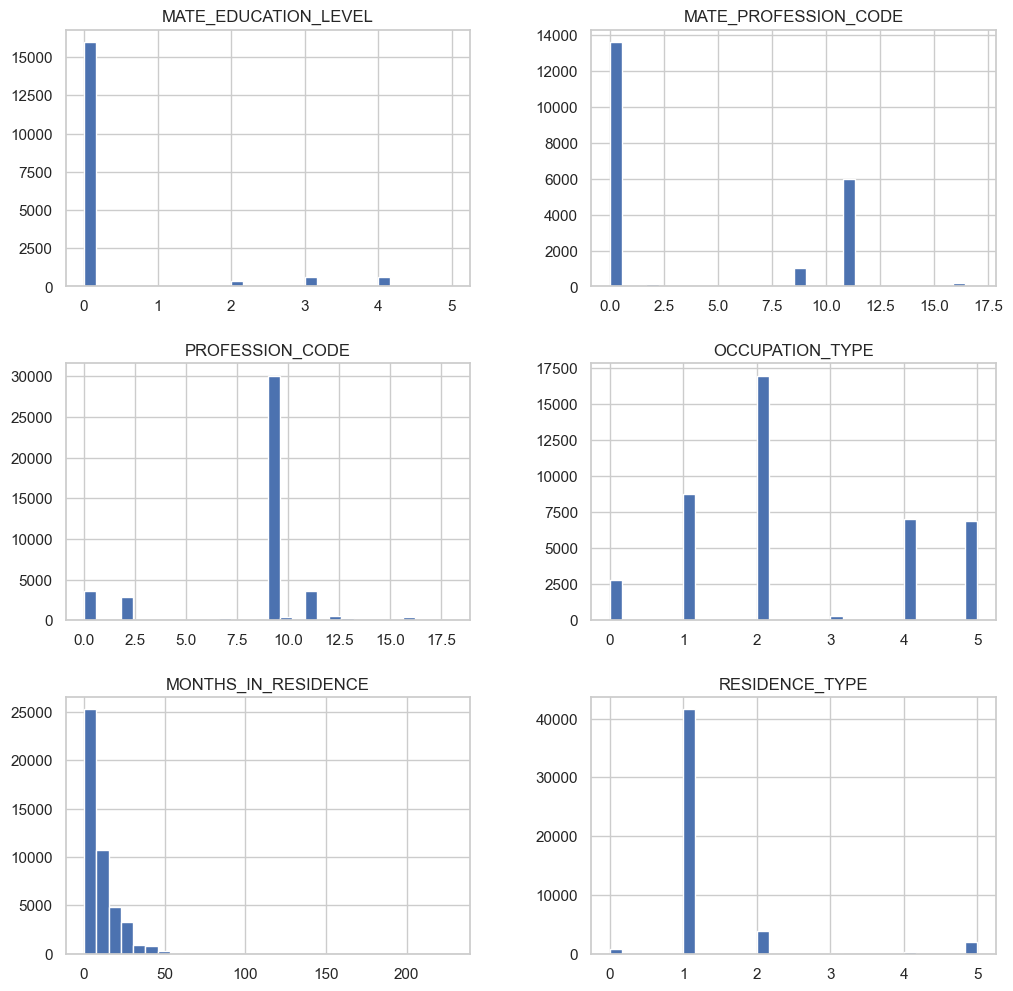

In [18]:
df_data_features[["PROFESSIONAL_CITY","PROFESSIONAL_BOROUGH","MATE_EDUCATION_LEVEL","MATE_PROFESSION_CODE","PROFESSION_CODE","OCCUPATION_TYPE","MONTHS_IN_RESIDENCE","RESIDENCE_TYPE"]].hist(bins=30, figsize=(12,12))

In [19]:
df_data_features["PROFESSIONAL_CITY"].value_counts()

FORTALEZA               419
SAO PAULO               338
                        331
PELOTAS                 324
PORTO ALEGRE            279
                       ... 
SANTIAGO                  1
JUNDIA                    1
SAO JOSE DO  ALEGRE       1
imbe                      1
conselheiro lafaiete      1
Name: PROFESSIONAL_CITY, Length: 2236, dtype: int64

In [20]:
df_data_features["MATE_EDUCATION_LEVEL"].value_counts()

0.0    15995
3.0      621
4.0      615
2.0      342
1.0       56
5.0       33
Name: MATE_EDUCATION_LEVEL, dtype: int64

In [21]:
df_data_features["MATE_PROFESSION_CODE"].value_counts()

0.0     13632
11.0     6005
9.0      1035
16.0      208
2.0       110
12.0       34
10.0       31
6.0        16
13.0       15
7.0        11
8.0         7
15.0        3
17.0        3
14.0        2
5.0         1
1.0         1
3.0         1
4.0         1
Name: MATE_PROFESSION_CODE, dtype: int64

In [22]:
df_data_features["PROFESSION_CODE"].value_counts()

9.0     30092
11.0     3545
0.0      3540
2.0      2827
12.0      489
10.0      425
16.0      344
13.0      313
7.0       216
8.0       144
6.0       136
15.0       63
17.0       35
4.0        27
3.0        18
5.0        12
14.0        9
1.0         8
18.0        1
Name: PROFESSION_CODE, dtype: int64

In [23]:
df_data_features["OCCUPATION_TYPE"].value_counts()

2.0    16947
1.0     8742
4.0     7000
5.0     6891
0.0     2788
3.0      319
Name: OCCUPATION_TYPE, dtype: int64

#### ANALYZING CATEORICAL FEATURES

In [24]:
#number of unique values per categorical column
df_data_features_types =df_data_features.select_dtypes(include=["object"]).nunique()
df_data_features_types

CLERK_TYPE                          1
APPLICATION_SUBMISSION_TYPE         3
SEX                                 4
STATE_OF_BIRTH                     29
CITY_OF_BIRTH                    9910
RESIDENCIAL_STATE                  27
RESIDENCIAL_CITY                 3529
RESIDENCIAL_BOROUGH             14511
FLAG_RESIDENCIAL_PHONE              2
RESIDENCIAL_PHONE_AREA_CODE       102
FLAG_MOBILE_PHONE                   1
COMPANY                             2
PROFESSIONAL_STATE                 28
PROFESSIONAL_CITY                2236
PROFESSIONAL_BOROUGH             5057
FLAG_PROFESSIONAL_PHONE             2
PROFESSIONAL_PHONE_AREA_CODE       87
FLAG_ACSP_RECORD                    1
RESIDENCIAL_ZIP_3                 794
PROFESSIONAL_ZIP_3                794
dtype: int64

In [25]:
#Features that need much cleaning data
print(df_data_features["CITY_OF_BIRTH"].map(lambda x: x.upper()).nunique())
print(df_data_features["RESIDENCIAL_CITY"].map(lambda x: x.upper()).nunique())
print(df_data_features["RESIDENCIAL_BOROUGH"].map(lambda x: x.upper()).nunique())

7414
2483
11815


In [26]:
print(df_data_features["CITY_OF_BIRTH"].apply(lambda x: unidecode(x)).map(lambda x: x.upper()).nunique())
print(df_data_features["RESIDENCIAL_CITY"].apply(lambda x: unidecode(x)).map(lambda x: x.upper()).nunique())
print(df_data_features["RESIDENCIAL_BOROUGH"].apply(lambda x: unidecode(x)).map(lambda x: x.upper()).nunique())

7414
2483
11815


#### ANALYZING NUMERICAL FEATURES    

In [27]:
#numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df_data_features.select_dtypes(include=numerics)
df_numeric

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,...,OCCUPATION_TYPE,MATE_PROFESSION_CODE,MATE_EDUCATION_LEVEL,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,ALL_INCOMES
0,1,5,0,1,6,1,0,1,1.0,15.0,...,4.0,NaN,NaN,0,0,0,0,1,32,900.00
1,2,15,0,1,2,0,0,1,1.0,1.0,...,4.0,11.0,NaN,0,0,0,0,1,34,750.00
2,3,5,0,1,2,0,0,1,1.0,NaN,...,NaN,NaN,NaN,0,0,0,0,1,27,500.00
3,4,20,0,1,2,0,0,1,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,1,61,500.00
4,5,10,0,1,2,0,0,1,1.0,12.0,...,5.0,NaN,NaN,0,0,0,0,1,48,1200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,10,0,1,1,2,0,1,1.0,14.0,...,4.0,0.0,0.0,0,0,0,0,1,36,1451.00
49996,49997,25,0,1,1,0,0,1,1.0,15.0,...,NaN,NaN,NaN,0,0,0,0,2,21,450.00
49997,49998,5,0,1,2,3,0,1,2.0,5.0,...,2.0,NaN,NaN,0,0,0,0,1,41,1555.00
49998,49999,1,0,1,1,1,0,1,1.0,NaN,...,2.0,NaN,NaN,0,0,0,0,1,28,1443.27


In [28]:
df_numeric.isnull().sum().sort_values(ascending = False)[:8]

MATE_EDUCATION_LEVEL     32338
MATE_PROFESSION_CODE     28884
PROFESSION_CODE           7756
OCCUPATION_TYPE           7313
MONTHS_IN_RESIDENCE       3777
RESIDENCE_TYPE            1349
PERSONAL_ASSETS_VALUE        0
QUANT_CARS                   0
dtype: int64

#### ANALYZING OTHER FEATURES

In [30]:
df_data_features.columns[39:53]

Index(['MONTHS_IN_THE_JOB', 'PROFESSION_CODE', 'OCCUPATION_TYPE',
       'MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL',
       'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF',
       'FLAG_INCOME_PROOF', 'PRODUCT', 'FLAG_ACSP_RECORD', 'AGE',
       'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'MONTHS_IN_THE_JOB'}>,
        <AxesSubplot: title={'center': 'PROFESSION_CODE'}>,
        <AxesSubplot: title={'center': 'OCCUPATION_TYPE'}>],
       [<AxesSubplot: title={'center': 'MATE_PROFESSION_CODE'}>,
        <AxesSubplot: title={'center': 'MATE_EDUCATION_LEVEL'}>,
        <AxesSubplot: title={'center': 'FLAG_HOME_ADDRESS_DOCUMENT'}>],
       [<AxesSubplot: title={'center': 'FLAG_RG'}>,
        <AxesSubplot: title={'center': 'FLAG_CPF'}>,
        <AxesSubplot: title={'center': 'FLAG_INCOME_PROOF'}>],
       [<AxesSubplot: title={'center': 'PRODUCT'}>,
        <AxesSubplot: title={'center': 'AGE'}>, <AxesSubplot: >]],
      dtype=object)

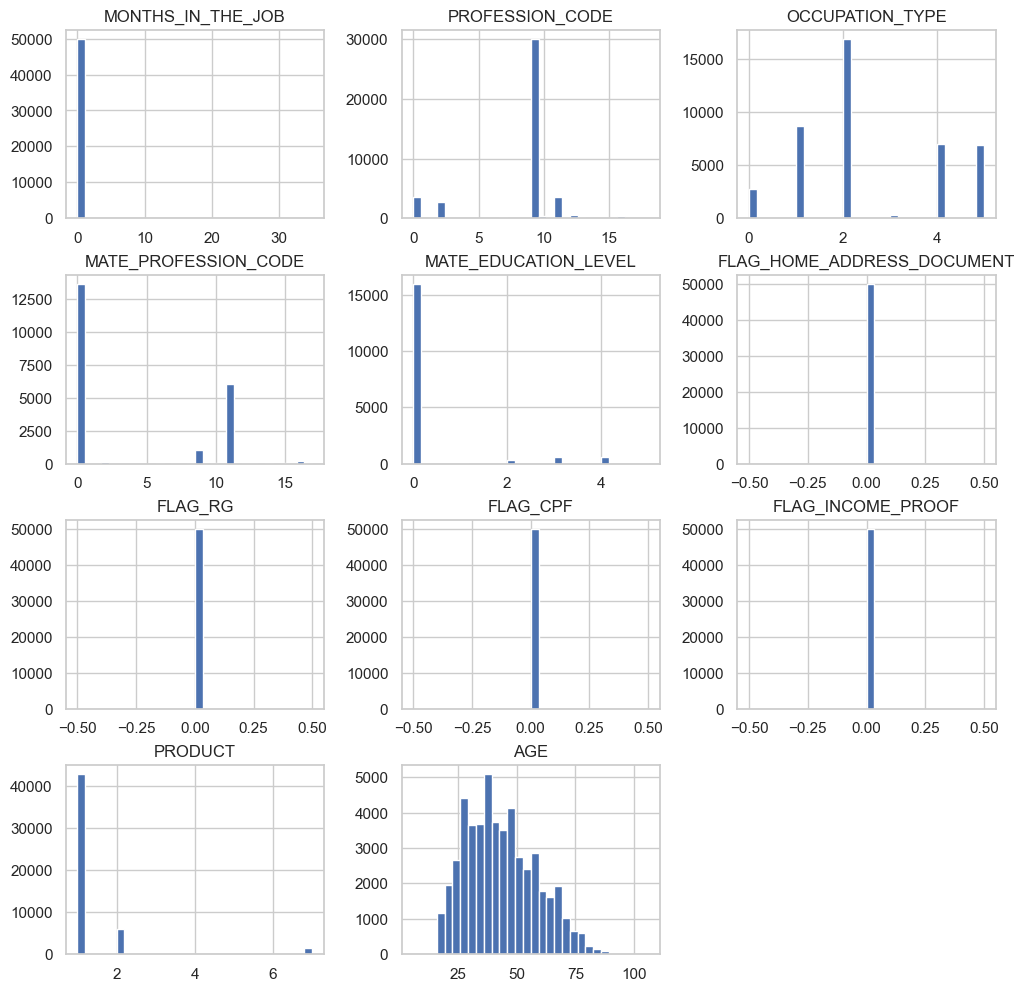

In [31]:
df_data_features[['MONTHS_IN_THE_JOB','PROFESSION_CODE','OCCUPATION_TYPE','MATE_PROFESSION_CODE', 'MATE_EDUCATION_LEVEL','FLAG_HOME_ADDRESS_DOCUMENT','FLAG_RG','FLAG_CPF','FLAG_INCOME_PROOF','PRODUCT','FLAG_ACSP_RECORD','AGE','RESIDENCIAL_ZIP_3','PROFESSIONAL_ZIP_3']].hist(bins=30, figsize=(12,12))

In [32]:
df_data_features["MONTHS_IN_THE_JOB"].value_counts()

0     49924
2        18
1        15
3        12
5         6
4         4
8         2
12        2
18        2
7         2
14        2
6         2
10        1
30        1
9         1
19        1
32        1
27        1
26        1
35        1
15        1
Name: MONTHS_IN_THE_JOB, dtype: int64

In [33]:
df_data_features["FLAG_HOME_ADDRESS_DOCUMENT"].value_counts()

0    50000
Name: FLAG_HOME_ADDRESS_DOCUMENT, dtype: int64

In [34]:
df_data_features["FLAG_RG"].value_counts()

0    50000
Name: FLAG_RG, dtype: int64

In [35]:
df_data_features["FLAG_CPF"].value_counts()

0    50000
Name: FLAG_CPF, dtype: int64

In [36]:
df_data_features["FLAG_INCOME_PROOF"].value_counts()

0    50000
Name: FLAG_INCOME_PROOF, dtype: int64

In [37]:
df_data_features["PRODUCT"].value_counts()

1    42690
2     6015
7     1295
Name: PRODUCT, dtype: int64

In [38]:
df_data_features[df_data_features["AGE"]<17]

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,ALL_INCOMES
22572,22573,C,5,0,0,1,F,2,0,0,...,0,0,0,0,7,N,6,440,440,1164.0
35963,35964,C,20,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,7,935,935,287.0
45471,45472,C,10,0,0,1,F,2,6,0,...,0,0,0,0,1,N,14,842,842,1267.0


<AxesSubplot: >

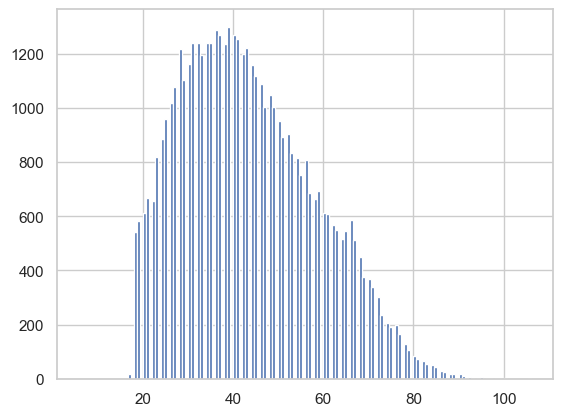

In [39]:
df_data_features["AGE"].hist(bins=150)

In [40]:
df_data_features["RESIDENCIAL_ZIP_3"].value_counts()

960        1085
591         839
570         763
628         671
456         664
           ... 
301           1
907           1
408           1
674           1
#DIV/0!       1
Name: RESIDENCIAL_ZIP_3, Length: 794, dtype: int64

In [41]:
df_data_features["PROFESSIONAL_ZIP_3"].value_counts()

960        1085
591         839
570         763
628         671
456         664
           ... 
301           1
907           1
408           1
674           1
#DIV/0!       1
Name: PROFESSIONAL_ZIP_3, Length: 794, dtype: int64

In [42]:
df_data_features["PROFESSION_CODE"].value_counts()

9.0     30092
11.0     3545
0.0      3540
2.0      2827
12.0      489
10.0      425
16.0      344
13.0      313
7.0       216
8.0       144
6.0       136
15.0       63
17.0       35
4.0        27
3.0        18
5.0        12
14.0        9
1.0         8
18.0        1
Name: PROFESSION_CODE, dtype: int64

In [43]:
df_data_features["OCCUPATION_TYPE"].value_counts()

2.0    16947
1.0     8742
4.0     7000
5.0     6891
0.0     2788
3.0      319
Name: OCCUPATION_TYPE, dtype: int64

In [44]:
df_data_features["FLAG_ACSP_RECORD"].value_counts()

N    50000
Name: FLAG_ACSP_RECORD, dtype: int64

In [45]:
df_data_features["FLAG_HOME_ADDRESS_DOCUMENT"].value_counts()

0    50000
Name: FLAG_HOME_ADDRESS_DOCUMENT, dtype: int64

In [46]:
df_data_features["POSTAL_ADDRESS_TYPE"].value_counts()

1    49673
2      327
Name: POSTAL_ADDRESS_TYPE, dtype: int64

In [47]:
df_data_features["RESIDENCE_TYPE"].value_counts()

1.0    41572
2.0     3884
5.0     1983
0.0      760
4.0      311
3.0      141
Name: RESIDENCE_TYPE, dtype: int64

In [48]:
df_data_features["MONTHS_IN_RESIDENCE"].value_counts().sort_values(ascending=True)[:20]


89.0        1
99.0        1
200.0       1
66.0        1
78.0        1
         ... 
4.0      1597
6.0      1605
15.0     1899
3.0      2284
20.0     2417
Name: MONTHS_IN_RESIDENCE, Length: 83, dtype: int64

In [49]:
df_data_features["APPLICATION_SUBMISSION_TYPE"].value_counts()

Web      28206
0        19461
Carga     2333
Name: APPLICATION_SUBMISSION_TYPE, dtype: int64

In [50]:
df_data_features["QUANT_ADDITIONAL_CARDS"].value_counts()

0    50000
Name: QUANT_ADDITIONAL_CARDS, dtype: int64

In [51]:
df_data_features["EDUCATION_LEVEL"].value_counts()

0    50000
Name: EDUCATION_LEVEL, dtype: int64

In [52]:
df_data_features["PAYMENT_DAY"].value_counts()

10    20422
15     8750
5      7347
25     7026
20     4694
1      1761
Name: PAYMENT_DAY, dtype: int64

In [53]:
df_data_features["MARITAL_STATUS"].value_counts()

2    25967
1    15286
4     4206
6     1877
5     1296
3      632
7      534
0      202
Name: MARITAL_STATUS, dtype: int64

In [54]:
df_data_features["QUANT_DEPENDANTS"].value_counts()

0     33655
1      7004
2      5363
3      2465
4       860
5       365
6       139
7        65
8        35
9        14
10       13
11        7
12        6
13        4
14        3
15        1
53        1
Name: QUANT_DEPENDANTS, dtype: int64

In [55]:
df_data_features["STATE_OF_BIRTH"].value_counts()

BA    5717
SP    5695
RS    5017
CE    4786
PE    4098
MG    3776
      2064
RN    2008
PR    1971
RJ    1826
PA    1692
AL    1645
PB    1609
MA    1416
GO    1143
MT     849
SC     707
PI     675
ES     638
MS     496
AC     474
SE     356
AM     354
DF     310
TO     244
AP     236
RO     155
RR      42
XX       1
Name: STATE_OF_BIRTH, dtype: int64

In [56]:
df_data_features["NACIONALITY"].value_counts()

1    47884
0     2018
2       98
Name: NACIONALITY, dtype: int64

In [57]:
df_data_features["RESIDENCE_TYPE"].value_counts()

1.0    41572
2.0     3884
5.0     1983
0.0      760
4.0      311
3.0      141
Name: RESIDENCE_TYPE, dtype: int64

In [58]:
df_data_features["PERSONAL_MONTHLY_INCOME"].value_counts()

350.00     6898
500.00     1453
400.00     1402
380.00     1362
600.00     1198
           ... 
412.39        1
406.78        1
2432.00       1
969.49        1
719.38        1
Name: PERSONAL_MONTHLY_INCOME, Length: 5495, dtype: int64

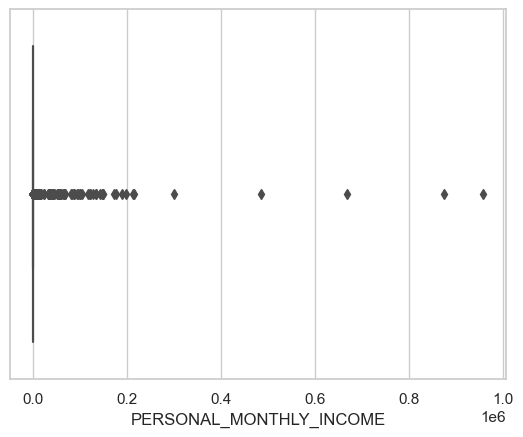

In [59]:
sns.boxplot(data=df_data_features, x='PERSONAL_MONTHLY_INCOME')
plt.show()

In [60]:
df_data_features["PERSONAL_MONTHLY_INCOME"].max()

959000.0

In [61]:
df_data_features["ALL_INCOMES"].value_counts()

350.00     6450
500.00     1409
400.00     1336
380.00     1272
600.00     1151
           ... 
126.00        1
2290.35       1
6909.89       1
5732.55       1
719.38        1
Name: ALL_INCOMES, Length: 5714, dtype: int64

In [62]:
df_data_features["ALL_INCOMES"].sort_values()

15912        60.0
19347        69.0
33280        94.0
46421       100.0
19553       100.0
           ...   
6501     300409.0
32630    486778.0
28119    668000.0
48271    875000.0
31053    959000.0
Name: ALL_INCOMES, Length: 50000, dtype: float64

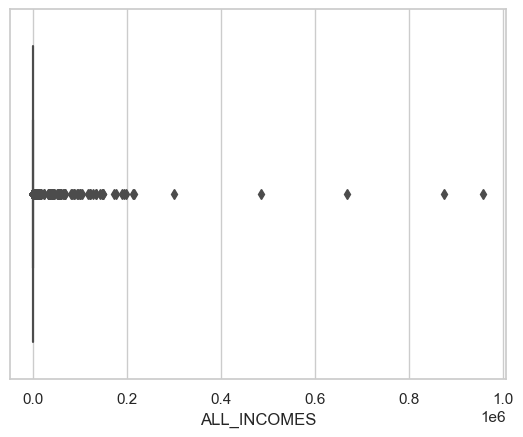

In [63]:
sns.boxplot(data=df_data_features, x='ALL_INCOMES')
plt.show()

In [64]:
df_data_features["PERSONAL_ASSETS_VALUE"].value_counts()

0.0         47609
30000.0       222
25000.0       198
50000.0       196
15000.0       185
            ...  
140000.0        1
27000.0         1
18500.0         1
8900.0          1
10500.0         1
Name: PERSONAL_ASSETS_VALUE, Length: 153, dtype: int64

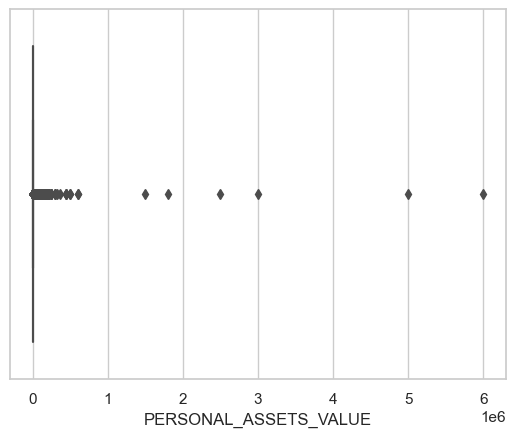

In [65]:
sns.boxplot(data=df_data_features, x='PERSONAL_ASSETS_VALUE')
plt.show()

In [66]:
df_data_features["FLAG_PROFESSIONAL_PHONE"].value_counts()

N    36510
Y    13490
Name: FLAG_PROFESSIONAL_PHONE, dtype: int64

In [67]:
df_data_features["QUANT_BANKING_ACCOUNTS"].value_counts()

0    32122
1    17864
2       14
Name: QUANT_BANKING_ACCOUNTS, dtype: int64